In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Density'>

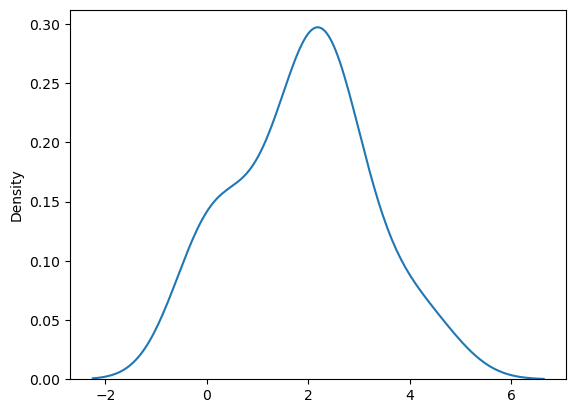

In [9]:
N = 20
# Generate test data with some known parameters
mu, sigma = 2, 1

y = np.random.normal(mu, sigma, N)
sns.kdeplot(y)

In [122]:
# our initial guesses
# a unit normal - we are making an assumption that the target distribution is normal here.
mu_cur = 0
sigma_cur = 1


step_size = 0.05

track = [(mu_cur, sigma_cur)]

for i in range(100_000):
    # perturb the initial guesses by some value
    rn = np.random.uniform(-1, 1)
    mu_proposal = mu_cur + (step_size * rn)
    rn = np.random.uniform(-1, 1)
    # sigma_proposal = np.abs(sigma_cur + (step_size * rn))
    sigma_proposal = np.exp(np.log(sigma_cur) + (step_size * rn))

    # compute the likelihood of current parameters and proposal
    # current
    pdf_cur = (2 * np.pi * sigma_cur**2) ** (-0.5) * np.exp(
        -((y - mu_cur) ** 2) / (2 * sigma_cur**2)
    )
    pdf_proposal = (2 * np.pi * sigma_proposal**2) ** (-0.5) * np.exp(
        -((y - mu_proposal) ** 2) / (2 * sigma_proposal**2)
    )

    acceptance_ratio = np.prod(pdf_proposal) / np.prod(pdf_cur)
    if acceptance_ratio > 1:
        # proposal has a higher probability of explaining data - go there
        mu_cur = mu_proposal
        sigma_cur = sigma_proposal
        track.append((mu_cur, sigma_cur))
    else:
        # accept the proposal with a probability equal to the acceptance ratio
        rn = np.random.random_sample()
        if rn <= acceptance_ratio:
            mu_cur = mu_proposal
            sigma_cur = sigma_proposal
            track.append((mu_cur, sigma_cur))


1.9352171734977588 1.3569173851849854
(92392, 2)


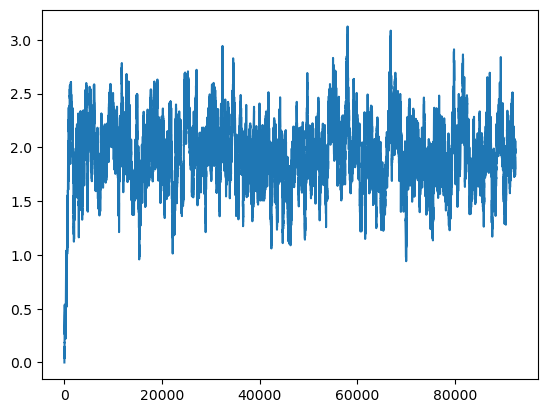

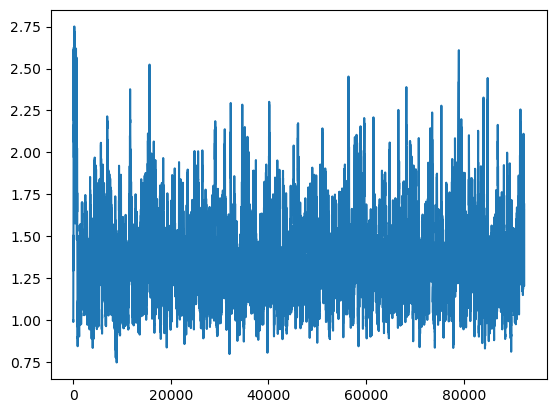

In [132]:
track_np = np.array(track)
print(np.mean(track_np[:, 0]), np.mean(track_np[:, 1]))
print(track_np.shape)
plt.plot(track_np[:, 0])
plt.show()
plt.plot(track_np[:, 1])

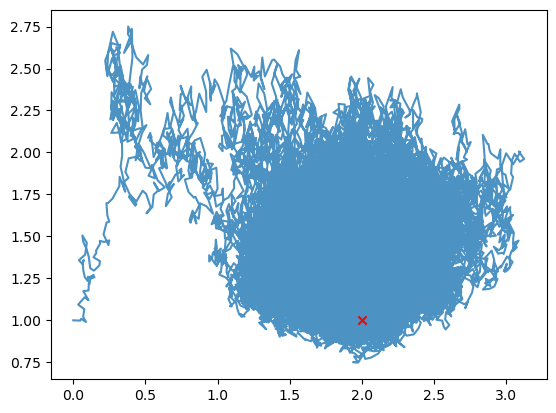

In [133]:
plt.scatter(2, 1, c="r", marker="x", zorder=10)
plt.plot(track_np[:, 0], track_np[:, 1], alpha=0.8)